In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

start = '2015-01-01'
end = '2023-12-31'

#Checking Apple
df = yf.download('AAPL', start=start, end=end)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320433,24.789802,23.879981,24.778679,212818400
2015-01-05,23.635288,24.169168,23.448431,24.089086,257142000
2015-01-06,23.637512,23.897778,23.274918,23.699798,263188400
2015-01-07,23.968966,24.069067,23.735393,23.846617,160423600
2015-01-08,24.889904,24.947741,24.180289,24.298189,237458000


In [2]:
#df.tail()
df = df.reset_index(drop=True)  # <- This avoids adding index columns to the DataFrame
if 'Date' in df.columns:
    df = df.drop(columns=['Date'])
df = df.drop(columns=['level_0', 'index'], errors='ignore')
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.320433,24.789802,23.879981,24.778679,212818400
1,23.635288,24.169168,23.448431,24.089086,257142000
2,23.637512,23.897778,23.274918,23.699798,263188400
3,23.968966,24.069067,23.735393,23.846617,160423600
4,24.889904,24.947741,24.180289,24.298189,237458000


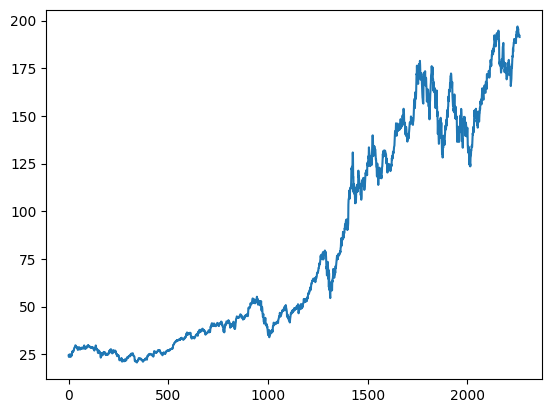

In [3]:
plt.plot(df.Close)

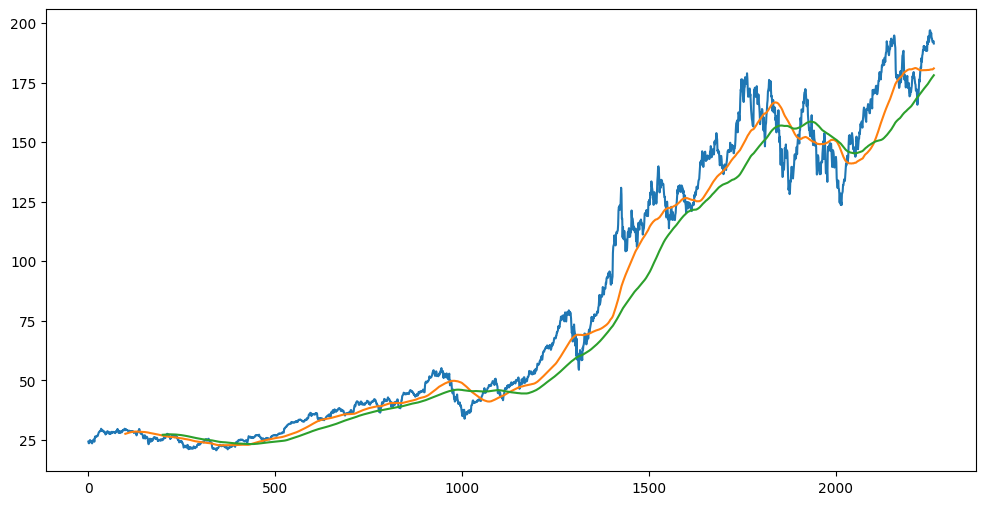

In [4]:
moving_average100 = df.Close.rolling(100).mean()
moving_average200 = df.Close.rolling(200).mean()
#moving_average100
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(moving_average100)
plt.plot(moving_average200)
#df.shape

In [5]:
# Now lets train and test

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.8)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.8):int(len(df))])
#print(data_testing.shape)

#Scaling down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)

x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
# below is scaled already, need to remember to scale it back later on
x_train, y_train = np.array(x_train), np.array(y_train)

#ML


[array([[0.02304536],
        [0.01871464],
        [0.01872869],
        [0.02082378],
        [0.02664493],
        [0.02681364],
        [0.02293288],
        [0.02429677],
        [0.02370621],
        [0.01951611],
        [0.01834902],
        [0.02218768],
        [0.02335468],
        [0.02736202],
        [0.02817757],
        [0.02834629],
        [0.0227782 ],
        [0.03145369],
        [0.03650154],
        [0.03405496],
        [0.03612192],
        [0.03615006],
        [0.03742956],
        [0.03862949],
        [0.03720374],
        [0.03831891],
        [0.04156564],
        [0.04560294],
        [0.04783331],
        [0.04870853],
        [0.04976723],
        [0.05102358],
        [0.05064246],
        [0.05212468],
        [0.05706535],
        [0.05589367],
        [0.05112241],
        [0.05342337],
        [0.05065658],
        [0.05154589],
        [0.05192704],
        [0.05076948],
        [0.0477627 ],
        [0.0480309 ],
        [0.04879323],
        [0